# WHATSAPP GROUP CHAT ANALYSIS FOR FABULOUS FAMILY
My cousins family whatsapp group.
This project is to understand how we communicate and the sentiment that defins the chats. 
Lets Start!

# Processing the Whatsapp Data

In [1]:
import os
os.chdir('C:/Users/Gloria/Desktop/Data_Science/Whatsapp_Analysis/Fab_Fam')

In [ ]:
# This function will read the text file into a python variable
def read_file(file):
    x = open(file, 'r', encoding='utf-8')  #Opens the text file into variable x
    y = x.read()  #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content

In [ ]:
# Call the text file into the chat variable
chat = read_file('fab_fam.txt')


Handling Multi-line messages

# Feature Extraction

In [ ]:
#Extracting the date variable
date = [chat[i].split(',')[0] for i in range(len(chat))]

In [ ]:
# Get time
time = [chat[i].split(',')[1:].split('-')[1:] for i in range(len(chat))]
time = [s.strip(' ') for s in time]

In [ ]:
# Get the name variable
## Get name
name = [chat[i].split('-')[1].split(':')[0] for i in range(len(chat))]

In [ ]:
# Get message
message = []
for i in range(len(chat)):
    try:
        message.append(chat[i].split(':')[2])
     except IndexError
            message.append('')   

In [2]:
import re

In [3]:
def startsWithDate(s):
    pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [19]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '^(\+\d{1,2}\s)?\(?\d{3}\) ((\(\d{3}\) ?)|(\d{3}-))?\d{3}-\d{4}:',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{6}):',         # Mobile Number (Europe)
        '([+]\d{3} \d{3} \d{6})'           # Mobile Number (Uganda)
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [20]:
def getDataPoint(line):
    splitLine = line.split(' - ') # splitLine = ['18/06/17, 22:47', 'Loki: Why do you have 2 numbers, Banner?']
    
    dateTime = splitLine[0] # dateTime = '18/06/17, 22:47'
    
    date, time = dateTime.split(', ') # date = '18/06/17'; time = '22:47'
    
    message = ' '.join(splitLine[1:]) # message = 'Loki: Why do you have 2 numbers, Banner?'
    
    if startsWithAuthor(message): # True
        splitMessage = message.split(': ') # splitMessage = ['Loki', 'Why do you have 2 numbers, Banner?']
        author = splitMessage[0] # author = 'Loki'
        message = ' '.join(splitMessage[1:]) # message = 'Why do you have 2 numbers, Banner?'
    else:
        author = None
    return date, time, author, message

Parse the entire file and handle multi-line messages

In [21]:
parsedChat = []
convoPath = './fab_fam.txt'
with open(convoPath, encoding='utf-8') as fp:
    fp.readline
    messageBuffer = []
    date, time, author = None, None, None

    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                parsedChat.append([date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getDataPoint(line)
                messageBuffer.append(message)
            else:
                messageBuffer.append(line)        

In [8]:
import pandas as pd

In [22]:
df = pd.DataFrame(parsedChat, columns=['Date', 'Time', 'Author', 'Message'])
df.head()

,Date,Time,Author,Message
0,None,None,None,"26/12/2017, 12:28 - Pauline: Lena and Pauline ..."
1,26/12/2017,15:58,Joanna,Testing 3-5 outdoor venues by night today and ...
2,26/12/2017,22:45,Joanna,<Media omitted>
3,28/12/2017,21:14,Micheal,It will happen to you
4,28/12/2017,21:39,+256 792 754083,See yourself


In [10]:
df.tail()

,Date,Time,Author,Message
7329,25/12/2019,12:40,Fina,Beautiful.
7330,25/12/2019,13:20,Joanna,Thank you😊🌹❤
7331,25/12/2019,13:20,Joanna,🤨🤔
7332,25/12/2019,18:47,Olivia Namulindwa,Merry Christmas Family🎄🎁 💝
7333,26/12/2019,16:58,Ben,<Media omitted>


In [11]:
df.describe()

,Date,Time,Author,Message
count,7333,7333,6677,7334
unique,577,1289,28,4955
top,26/11/2019,08:10,Joanna,<Media omitted>
freq,172,29,1300,1571


In [23]:
#no. of images, images are represented by <media omitted>
media = df[df['Message'] == "<Media omitted>"]
media.shape

(1604, 4)

In [24]:
#Number of group notifications
grp_notif = df[df['Author']=="grp_notif"] 
grp_notif.shape

(0, 4)

In [25]:
message_deleted = df[df['Message'] == "This message was deleted"]
message_deleted.shape

(93, 4)

In [26]:
#Drop the media ommitted messages and group notifications and deleted messages
df.drop(media.index, inplace=True)
df.drop(grp_notif.index, inplace=True)
df.drop(message_deleted.index, inplace=True)

In [38]:
#Find the null values
df.isnull().sum()

Date       0
Time       0
Author     0
Message    0
dtype: int64

In [35]:
#Drop empty rows with tina
df = df.dropna()

In [36]:
df.reset_index(inplace=True, drop=True)
df.shape

(5185, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 4 columns):
Date       5185 non-null object
Time       5185 non-null object
Author     5185 non-null object
Message    5185 non-null object
dtypes: object(4)
memory usage: 162.1+ KB


In [32]:
df.head()

,Date,Time,Author,Message
1,26/12/2017,15:58,Joanna,Testing 3-5 outdoor venues by night today and ...
2,28/12/2017,21:14,Micheal,It will happen to you
3,28/12/2017,21:39,+256 792 754083,See yourself
4,28/12/2017,23:12,Beth,"23/12/2017, 23:42:10 ‪+256 701 839948‬ BEWARE...."
5,29/12/2017,15:27,None,"Tina, Kerbi: <Media omitted>"


# Data Exploration

In [40]:
#Let's get a general idea on the data set
df.describe()

,Date,Time,Author,Message
count,5185,5185,5185,5185
unique,507,1215,35,4595
top,26/11/2019,22:07,Joanna,Amen
freq,154,18,1007,35


In [41]:
import matplotlib.pyplot as plot 
import seaborn as sns

The most talkative among us goes to...

Text(0.5, 1.0, 'The Top 10 Most Talkative Persons')

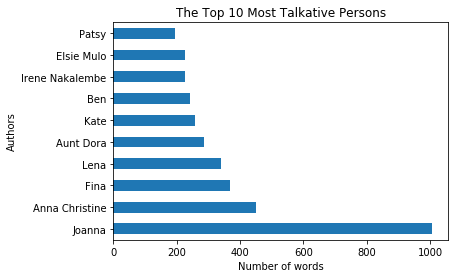

In [45]:
author_value_counts = df['Author'].value_counts()
top10_talkers = author_value_counts.head(10)
top10_talkers.plot.barh()
plot.xlabel('Number of words')
plot.ylabel('Authors')
plot.title('The Top 10 Most Talkative Persons')

Well no surprise there, cousin Joana definately takes the cake🎂

Maybe we have a look at the words sent in total by each author in the group from 2017 till date

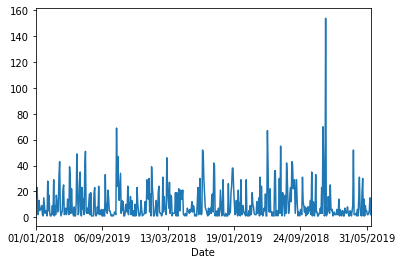

In [53]:
df.groupby('Date')['Message'].count().plot()
plot.ylabel('Number of messages')

In [59]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y', infer_datetime_format=True)

C:\Users\Gloria\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
import calendar
import datetime as dt

In [60]:
df['weekday'] = pd.Series(pd.Categorical(df['Date'].dt.weekday_name, categories=list(calendar.day_name)))

C:\Users\Gloria\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df['time_chat'] = pd.to_datetime(df['Time'],format= '%H:%M:%S',infer_datetime_format=True)

C:\Users\Gloria\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
